In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:


# Load the dataset
data = pd.read_csv("./winequality-white.csv")
data  = data[['total sulfur dioxide','density','chlorides','quality']]
# Define features and target
X = data.drop(columns=["quality"])
y = data["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.4561224489795918
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.46      0.26      0.34       291
           6       0.46      0.82      0.59       432
           7       0.42      0.09      0.15       192
           8       0.00      0.00      0.00        35

    accuracy                           0.46       980
   macro avg       0.22      0.20      0.18       980
weighted avg       0.42      0.46      0.39       980



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[6 6 6 ... 6 6 6]
0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
Accuracy: 0.4495712535728869


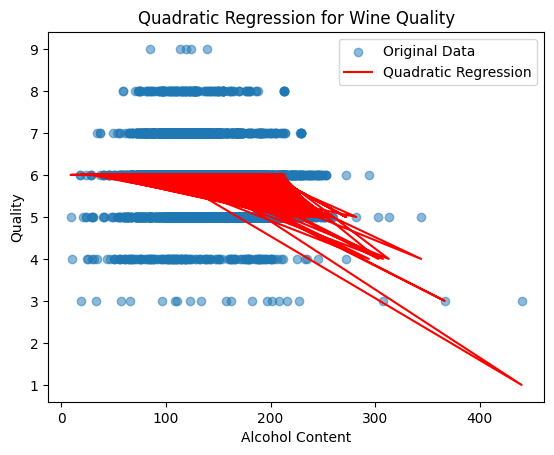

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the wine quality data
data = pd.read_csv("./winequality-white.csv")  # Replace with the actual file path

# Select the feature and target variable
X = data['total sulfur dioxide'].values.reshape(-1, 1)  # Use 'alcohol' as the predictor
Y = data['quality']

# Create quadratic features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a quadratic regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict wine quality using the model
Y_pred = model.predict(X_poly)
Y_pred = np.round(Y_pred).astype(int)
print(Y_pred)
print(Y)
# Evaluate the model
accuracy = accuracy_score(Y, Y_pred)
# report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
# Plot the original data and the quadratic regression curve
plt.scatter(X, Y, label='Original Data', alpha=0.5)
plt.plot(X, Y_pred, color='red', label='Quadratic Regression')
plt.legend()
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Quadratic Regression for Wine Quality')
plt.show()

In [48]:
pd.DataFrame(Y_pred).value_counts()

6    4679
5     212
4       5
1       1
3       1
Name: count, dtype: int64

In [47]:
pd.DataFrame(Y).value_counts()


quality
6          2198
5          1457
7           880
8           175
4           163
3            20
9             5
Name: count, dtype: int64

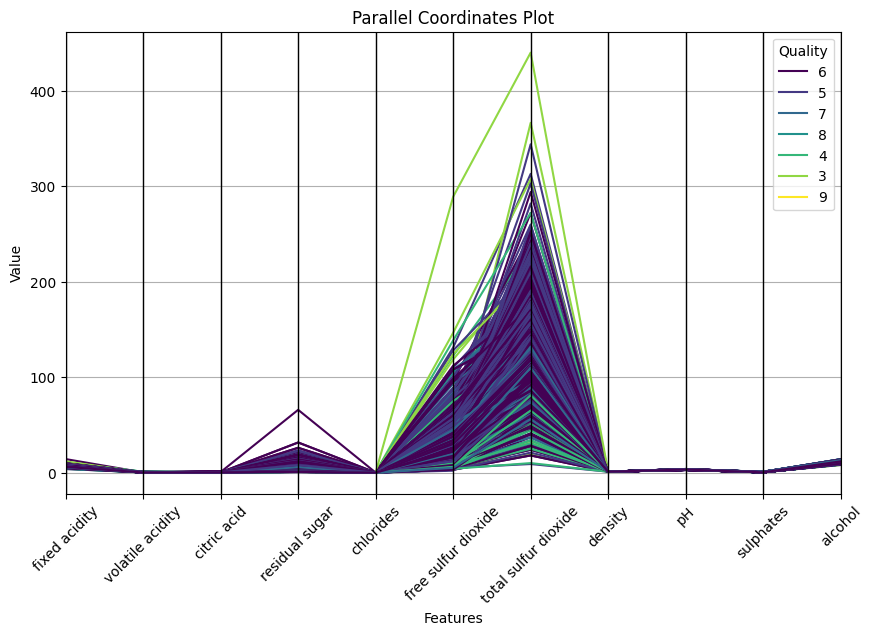

In [9]:
# Create a DataFrame with just the features and quality
data_subset = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(data_subset, 'quality', colormap=plt.get_cmap('viridis'))
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Parallel Coordinates Plot")
plt.xticks(rotation=45)
plt.legend(title="Quality", loc="upper right")
plt.show()

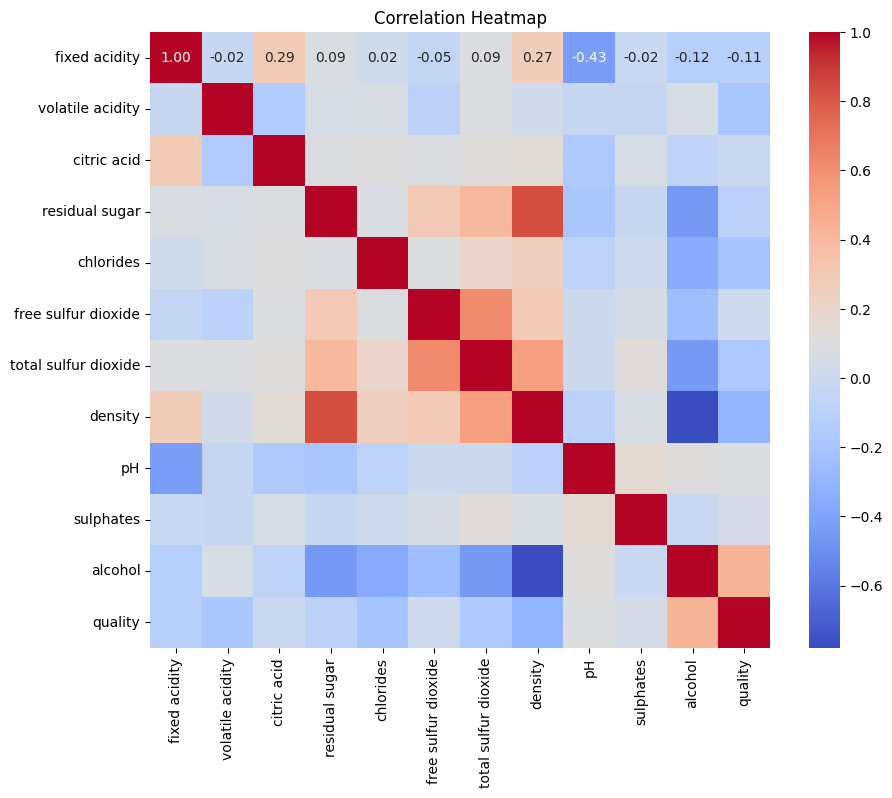

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
